# Datascience Model

## Lineair Regression Model

In dit bestand maak ik het lineaire regressie model voor het voorstellen van een verband tussen de gemiddelde UV index per staat en het aantal melanoom voorkomensten, en het aantal melanoom sterftegevallen. Hiervoor gebruik ik het melanoma.csv dataframe dat ik tijdens de preperation heb gemaakt. 

In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

Vervolgens gaan we de dataset inladen en de X, Y en Z waardes toekennen aan de melanoom sterftegevallen, melanoom voorkomst, en de UV index respectievelijk. 

Text(0, 0.5, 'Melanoma Deaths')

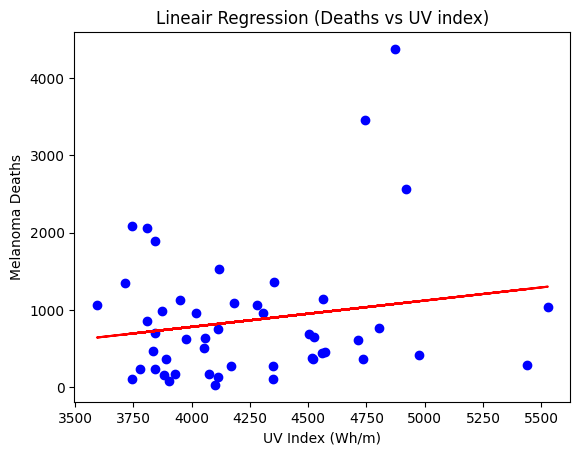

In [62]:
melanoma_df = pd.read_csv('melanoma.csv')

deaths = melanoma_df.iloc[:,1].values.reshape(-1,1)
incidence = melanoma_df.iloc[:,2].values.reshape(-1,1)
UV = melanoma_df.iloc[:,3].values.reshape(-1,1)

lr = LinearRegression()
deaths_model = lr.fit(UV, deaths)
deaths_prediction_linear = lr.predict(UV)

plt.scatter(UV, deaths, color = 'blue')
plt.plot(UV, deaths_prediction_linear, color = 'red')

plt.title('Lineair Regression (Deaths vs UV index)')
plt.xlabel('UV Index (Wh/m)')
plt.ylabel('Melanoma Deaths')

Text(0, 0.5, 'Melanoma Incidence')

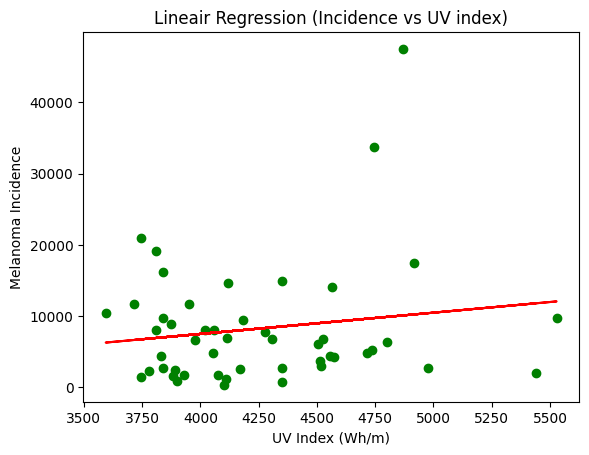

In [63]:
incidence_model = lr.fit(UV, incidence)
incidence_prediction_linear = lr.predict(UV)
plt.scatter(UV,incidence, color = 'green')
plt.plot(UV, incidence_prediction_linear, color = 'red')

plt.title('Lineair Regression (Incidence vs UV index)')
plt.xlabel('UV Index (Wh/m)')
plt.ylabel('Melanoma Incidence')

**R-Squared**

Vervolgens deze regressie evalueren door te kijken naar verschillende metrics van het model. Ik begin hiermee bij de R^2. Dit geeft aan welk deel van de variantie wordt verklaard door de opgegeven parameer (dus ofwel het sterfte aantal of het aantal voorkomsten van melanomen). 

In [4]:
r_squared_deaths = deaths_model.score(UV, deaths)
print(f"R-squared deaths: {r_squared_deaths}")
r_squared_cases = incidence_model.score(UV, incidence)
print(f"R-squared cases: {r_squared_cases}")

R-squared deaths: -76.84983721466926
R-squared cases: 0.024071125643164826


De r-squared waarde van het model wat sterfte aantal met UV index combineert heeft een negatieve waarde. Dit betekend dat het gemiddelde de variatie beter verklaard dan het opgestelde model, dit houdt in dat het geen goed model is. 

De r-squared waarde van het model wat het aantal voorkomsten van melanomen combineert met de uv index, heeft een hele lage waarde (dicht bij de 0). Dit betekend dat het model de variantie iets beter verklaard dan het gemiddelde maar het model verklaard het wel maar voor een erg klein deel. Dit is een voorbeeld van under fitten, en geeft aan dat het model wellicht complexer gemaakt moet worden. 



**Mean Squared Error (MSE) / Root Mean Squared Error (RSME)**

Hieronder ga ik de mean square error (MSE) berekenen voor beide modellen. Waar R^2 een relatieve maat is voor de fit van een model, is de MSE een absolute maat voor de fit van een model.

In [5]:
print(f"MSE deaths: {mean_squared_error(deaths, deaths_prediction)}")
print(f"RMSE deaths: {math.sqrt(mean_squared_error(deaths, deaths_prediction))}")

print(f"MSE cases: {mean_squared_error(incidence, incidence_prediction)}")
print(f"RMSE cases: {math.sqrt(mean_squared_error(incidence, incidence_prediction))}")

MSE deaths: 702119.4313621582
RMSE deaths: 837.9256717407327
MSE cases: 70598400.0680932
RMSE cases: 8402.285407440835


**Mean Absolute Error (MAE)**

Hieronder ga ik de Mean Absolute Error berekenen. Dit berekend de absolute error waarde, in plaats van de squared waarde van de voorspelling. 

In [6]:
print(f"MAE deaths: {mean_absolute_error(deaths, deaths_prediction)}")
print(f"MAE cases: {mean_absolute_error(incidence, incidence_prediction)}")

MAE deaths: 609.4891825285187
MAE cases: 5863.789337188441


**Exploring Residuals**

Om het model verder te evalueren kunnen we ook kijken naar losse residuals. Deze waardes worden gebaseerd op de waargenomen waardes en de voorspelde waardes. 

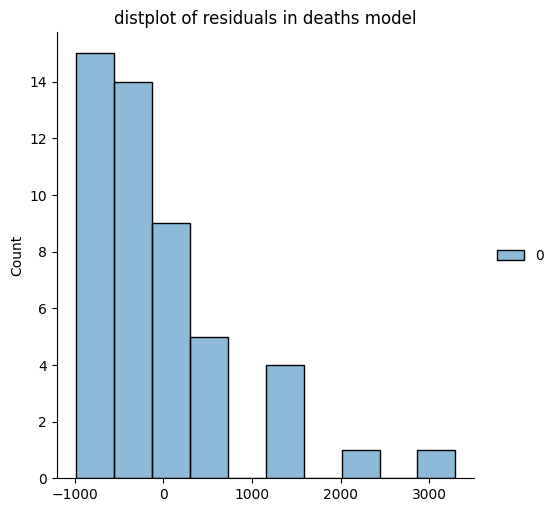

In [78]:
residual_deaths = deaths - deaths_prediction
residual_deaths_dist = sns.displot(residual_deaths).set(title = "distplot of residuals in deaths model")

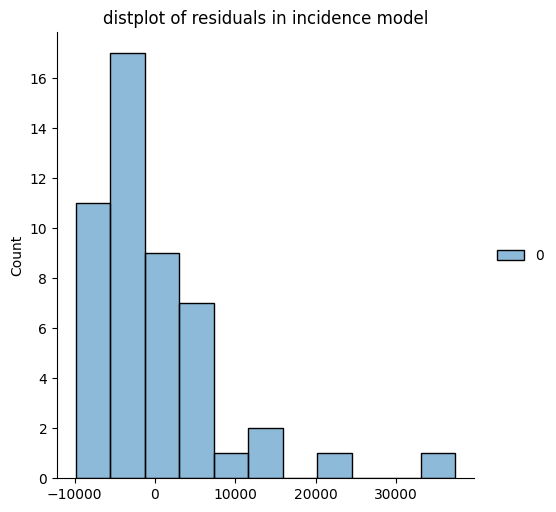

In [79]:
residual_cases = incidence - incidence_prediction
residual_cases_dist = sns.displot(residual_cases).set(title = "distplot of residuals in incidence model")

Text(0.5, 1.0, 'real vs predicted values (deaths)')

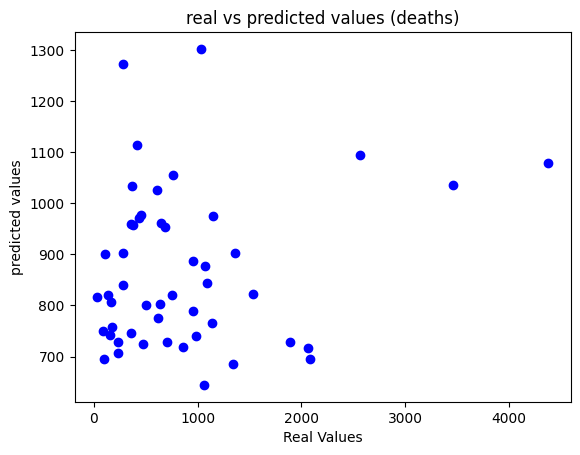

In [81]:
plt.scatter(deaths,deaths_prediction, color = 'blue')
plt.xlabel("Real Values")
plt.ylabel("predicted values")
plt.title("real vs predicted values (deaths)")

Text(0.5, 1.0, 'real vs predicted values (incidence)')

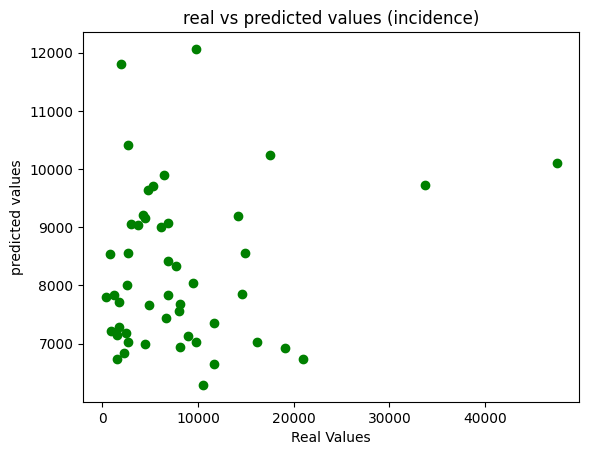

In [82]:
plt.scatter(incidence,incidence_prediction, color = 'green')
plt.xlabel("Real Values")
plt.ylabel("predicted values")
plt.title("real vs predicted values (incidence)")

**Coefficienten en intercepten van de modellen**

Als laatste deel van de evaluatie ga ik kijken naar de coefficienten van het model. 

In [80]:
print(f"Intercept deahts model: {deaths_model.intercept_}")
print(f"Coefficient deaths model: {deaths_model.coef_}")
print(f"Intercept cases model: {incidence_model.intercept_}")
print(f"Coefficient cases model: {incidence_model.coef_}")

Intercept deahts model: [-4435.53549874]
Coefficient deaths model: [[2.98438492]]
Intercept cases model: [-4435.53549874]
Coefficient cases model: [[2.98438492]]


## Polynomial model

Om verschillende modellen met elkaar te kunnen vergelijken ga ik nu een polynomiaal model maken. Ik ga eerst een model maken wat voor het verband door de sterfte door melanomen in combinatie met de UV index. 

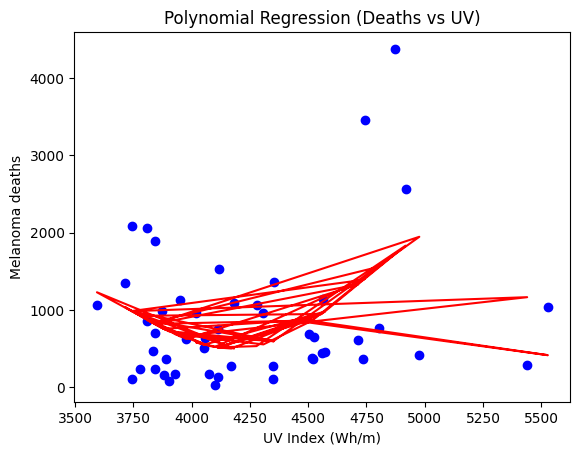

In [71]:
poly = PolynomialFeatures(degree = 4)
UV_poly = poly.fit_transform(UV)
  
poly.fit(UV_poly, deaths)
lin2 = LinearRegression()
deaths_model_polynomial = lin2.fit(UV_poly, deaths)

deaths_prediction_polynomial = lin2.predict(poly.fit_transform(UV))

plt.scatter(UV, deaths, color = 'blue')
  
plt.plot(UV, deaths_prediction_polynomial, color = 'red')
plt.title('Polynomial Regression (Deaths vs UV)')
plt.xlabel('UV Index (Wh/m)')
plt.ylabel('Melanoma deaths')
  
plt.show()

Om te kijken of dit model de data beter beschrijft ga ik ook voor dit model naar de r-squared en de RSME kijken.

In [72]:
r_squared_deaths = deaths_model_polynomial.score(UV, deaths)
print(f"R-squared deaths: {r_squared_deaths}")

print(f"MSE deaths: {mean_squared_error(deaths, deaths_prediction_polynomial)}")
print(f"RMSE deaths: {math.sqrt(mean_squared_error(deaths, deaths_prediction_polynomial))}")

ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

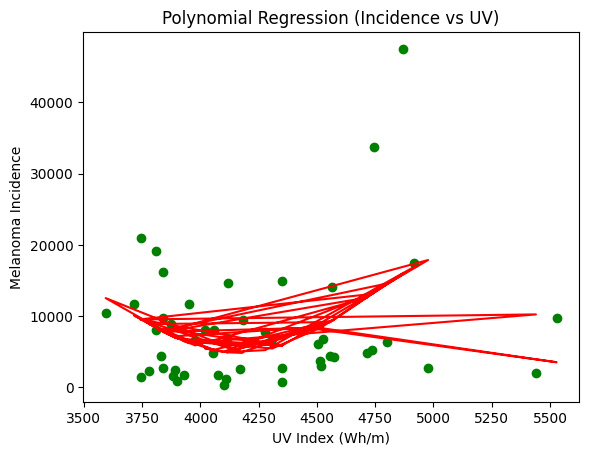

In [73]:
poly = PolynomialFeatures(degree = 4)
UV_poly = poly.fit_transform(UV)
poly.fit(UV_poly, incidence)

lin2 = LinearRegression()
incidence_model_polynomial = lin2.fit(UV_poly, incidence)
incidence_prediction_polynomial = lin2.predict(poly.fit_transform(UV))

plt.scatter(UV, incidence, color = 'green')
  
plt.plot(UV, incidence_prediction_polynomial, color = 'red')
plt.title('Polynomial Regression (Incidence vs UV)')
plt.xlabel('UV Index (Wh/m)')
plt.ylabel('Melanoma Incidence')
  
plt.show()

Ook voor het model wat kijkt naar de melanoom voorkomst met de UV index ga ik kijken naar de r-squared en de RSME.

In [74]:
r_squared_deaths = incidence_model_polynomial.score(UV, deaths)
print(f"R-squared deaths: {r_squared_deaths}")

print(f"MSE deaths: {mean_squared_error(incidence, incidence_prediction_polynomial)}")
print(f"RMSE deaths: {math.sqrt(mean_squared_error(incidence, incidence_prediction_polynomial))}")

ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

**Elastic Net Regression**

Aan de hand van de r-squared en de RSME is te concluderen dat het lineaire model de data voor zowel de voorkomst als de sterfte beter beschrijft. 

Omdat het lineaire model een grote richtings coefficient heeft, kan het interessant zijn om elastic net regression toe te passen, om het model op deze manier stabieler te maken. 

In [77]:
Elastic_net_deaths = ElasticNet(alpha = 1.0)


**Univariate Function Optimization**

Dit is een methode die kan worden gebruikt voor de optimalizatie van een model wat maar 1 variabele bevat. 

In [83]:
result = minimize_scalar(objective, method='brent')

NameError: name 'minimize_scalar' is not defined